In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt


In [2]:
test = pd.read_csv('/content/test.csv')
train=pd.read_csv('/content/train.csv')

In [3]:
test.shape,train.shape

((3263, 4), (7613, 5))

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

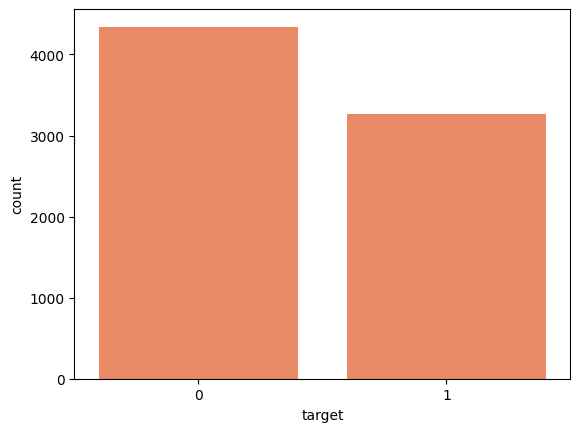

In [6]:
sns.countplot(x='target',data=train,color='coral')

In [8]:
# length of the tweets
train['text_len'] = train.text.apply(len)
test['text_len'] = test.text.apply(len)

In [9]:
# length of the words in the tweets
train['word_count'] = train.text.apply(lambda x:len(str(x).split()))
test['word_count'] = test.text.apply(lambda x:len(str(x).split()))

#len(train.text[0].split())

In [10]:
train.head(2)

,id,keyword,location,text,target,text_len,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7


In [11]:
test.head(2)

,id,keyword,location,text,text_len,word_count
0,0,NaN,NaN,Just happened a terrible car crash,34,6
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64,9


In [12]:
# jo bhi features banana hai must be on both train and test so that we will be able to do the prediction on the test

In [13]:
# Lets set the theme of the plot
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-paper')

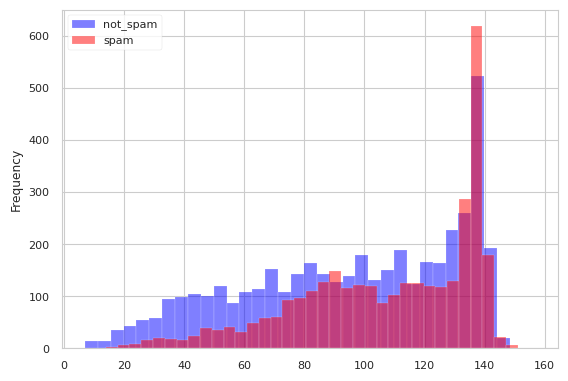

In [15]:
#lets plot the text length

train.loc[train.target==0,'text_len'].plot(kind='hist',alpha=0.5,color='blue',bins=35,label='not_spam')
train.loc[train.target==1,'text_len'].plot(kind='hist',alpha=0.5,color='red',bins=35,label='spam')
plt.legend()
plt.show()


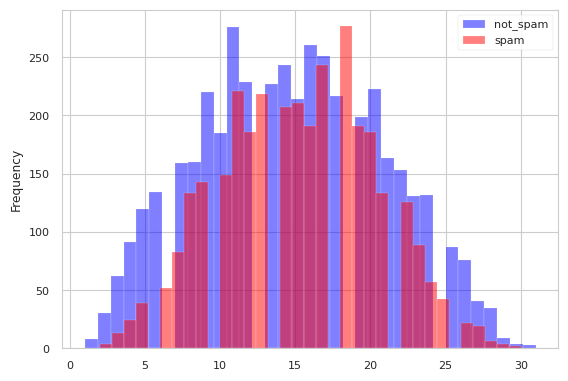

In [16]:
#lets plot the word length

train.loc[train.target==0,'word_count'].plot(kind='hist',alpha=0.5,color='blue',bins=35,label='not_spam')
train.loc[train.target==1,'word_count'].plot(kind='hist',alpha=0.5,color='red',bins=35,label='spam')
plt.legend()
plt.show()


In [17]:
# we are checking the distribution of both if kisi m jyada char ho to skew bhi ho skti hai

# Text Preprocessing

In [18]:
train.loc[train.target==1,'text_len'].describe()

count    3271.000000
mean      108.113421
std        29.309854
min        14.000000
25%        88.000000
50%       115.000000
75%       136.000000
max       151.000000
Name: text_len, dtype: float64

In [19]:
train.loc[train.target==0,'text_len'].describe()

count    4342.000000
mean       95.706817
std        35.885924
min         7.000000
25%        68.000000
50%       101.000000
75%       130.000000
max       157.000000
Name: text_len, dtype: float64

In [20]:
train.loc[train.text_len==151,'text']

614    @CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...
Name: text, dtype: object

In [21]:
train.loc[614,'text']

'@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT F @USAgov AUTH Hostage&amp;2 make her look BLK w/Bioterrorism&amp;use her lgl/org IDis ID still hers?@VP'

In [22]:
tweet = '@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...'

In [23]:
import re

In [24]:
re.sub('[^a-zA-Z]+'," ",tweet).strip()

'CAgov If BLKs amp WHTs colluded take WHT'

In [38]:
re.sub('[^a-zA-Z]+'," ",tweet)

' CAgov If BLKs amp WHTs colluded take WHT '

In [31]:
re.findall('[^a-zA-Z]+',tweet)

['@', ' ', ' 90', '&', ';8', ' ', ' 2 ', ' ', '...']

In [32]:
re.findall('[a-zA-Z]+',tweet)

['CAgov', 'If', 'BLKs', 'amp', 'WHTs', 'colluded', 'take', 'WHT']

In [29]:
re.findall('[^a-zA-Z0-9]+',tweet)  # Give me everything expect text ~ noise

['@', ' ', ' ', '&', ';', ' ', ' ', ' ', ' ', '...']

In [34]:
re.findall('\W+',tweet) # same as above but with different code

['@', ' ', ' ', '&', ';', ' ', ' ', ' ', ' ', '...']

In [36]:
re.findall('\w+',tweet) # for all words

['CAgov', 'If', '90BLKs', 'amp', '8WHTs', 'colluded', '2', 'take', 'WHT']

In [37]:
re.findall('\d+',tweet)  # for all digits

['90', '8', '2']

In [39]:
re.sub('@[a-zA-Z]+'," ",tweet).strip()  # This code removes @ mentions .strip removes white spaces

'If 90BLKs&amp;8WHTs colluded 2 take WHT...'

In [66]:
# the function to clean

def clean_text(text):
  text = re.sub('@[a-zA-Z0-9]+'," ",text) # removes @mentions
  text = re.sub('(https:.?\W+/\S+)|(http:.?\W+/\S+)'," ",text) # eliminate hyperlink
  text = re.sub('www.\S+'," ",text)  # removes www hyperlink
  text = re.sub('[^a-zA-Z0-9]'," ",text) # removes special characters
  text = re.sub('\d+'," ",text)
  text = re.sub('\s+'," ",text).strip()
  return text





In [67]:
#@[a-zA-Z0-9]+|\W
# https:.?\W+/\S+|http:.?\W+/\S+|www:.?\W+/\S+
# symbols : d,w,W, [a-zA-Z0-9],/\

In [68]:
train['clean_text'] = train.text.apply(clean_text)
test['clean_text'] = test.text.apply(clean_text)





In [69]:
train.clean_text.nunique()

6832

In [70]:
# for removing special charecters there are few left after regex
# another method
import string
noise = string.punctuation

train['clean_text'] = [text for text in train.clean_text if text not in noise]
test['clean_text'] = [text for text in test.clean_text if text not in noise]

In [47]:
train.head(2)

,id,keyword,location,text,target,text_len,word_count,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,Forest fire near La Ronge Sask Canada


In [71]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

#print(stopwords.words('enlish'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
# tokenize the sentences - converting the sentences into words
# step 2 : generate a frequency table of the tokens generated
# step 3: Create a Word cloud


#[word_tokenize(word) for words in train.clean_text]
words = []
for i in train.clean_text:
  words.append(word_tokenize(i))

print(words)

# Remove the stopwords
stop = set(stopwords.words('english'))
stop.add('would')

all_tokens = [token for review_token in words for token in review_token if token.lower() not in stop]


[['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all'], ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada'], ['All', 'residents', 'asked', 'to', 'shelter', 'in', 'place', 'are', 'being', 'notified', 'by', 'officers', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected'], ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'in', 'California'], ['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', 'Alaska', 'as', 'smoke', 'from', 'wildfires', 'pours', 'into', 'a', 'school'], ['RockyFire', 'Update', 'California', 'Hwy', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', 'CAfire', 'wildfires'], ['flood', 'disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou', 'Colorado', 'Springs', 'areas'], ['I', 'm', 'on', 'top', 'of', 'the', 'hill', 'and', 'I', 'can', 'see', 'a', 'fire', 'in', 'the', 'woods'], ['There', 's', 'an', 'e

In [78]:
df = pd.DataFrame(FreqDist(all_tokens).items(),columns=['Tokens','Count']).sort_values(by='Count',ascending=False)
# creating a dataframe and the frequency table


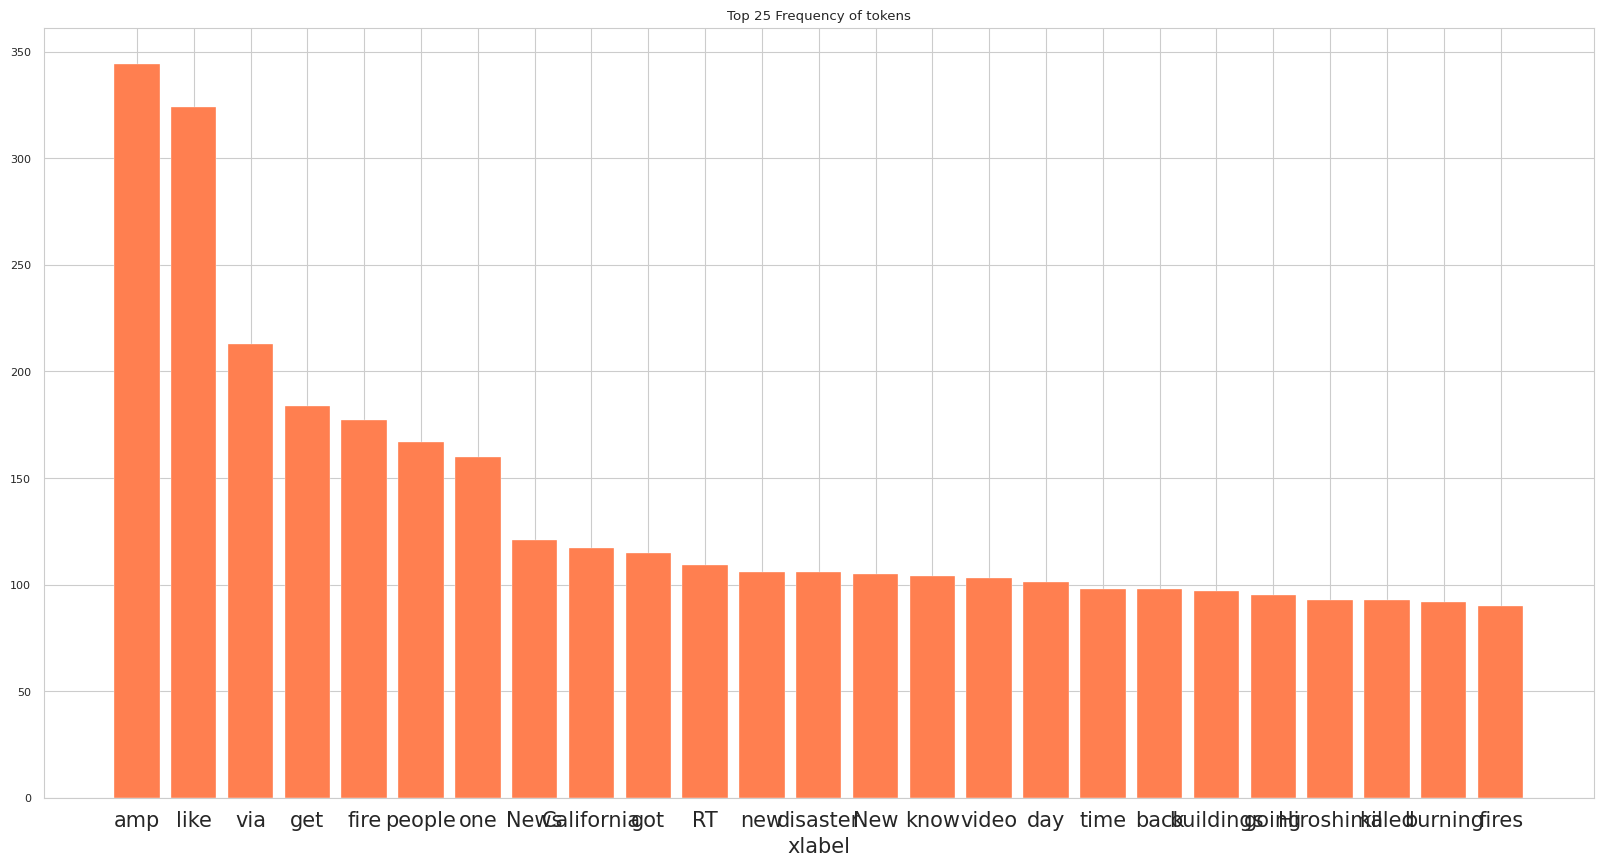

In [79]:
#plot the 25 tokens Frequency
plt.figure(figsize=(20,10))
plt.bar(df['Tokens'][:25],df['Count'][:25],color='coral')
plt.title('Top 25 Frequency of tokens')
plt.xticks(size=15)
plt.xlabel('xlabel', fontsize=15)
plt.show()

In [80]:
'would' in stop

True

## Bag of Words Model

* Bag of Words simply represent how many times a Given word has appeared in the body of text

pros: Simple & Easy to Use

Cons: Semantic Meaning gets lost. Each Word is used in the individual capacity to build the model

cons: Sparse Matrix(High Dimensional Data )

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cov = CountVectorizer(stop_words='english',token_pattern='[a-zA-Z0-9]+')
converted = cov.fit_transform(all_tokens).todense()
print(converted.shape)
print(len(cov.get_feature_names_out()))

(66843, 13916)
13916


In [91]:
d = pd.DataFrame(converted[:7613])

In [85]:
#pd.DataFrame(converted,columns=cov.get_feature_names_out())

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#xtrain,xtest,ytrain,ytest = train_test_split(converted[:7613],train.target,test_size=0.20,random_state=13916)

In [92]:
xtrain,xtest,ytrain,ytest = train_test_split(d,train.target,test_size=0.20,random_state=13916)

In [93]:
pred = rf.fit(xtrain,ytrain).predict(xtest)

In [94]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       868
           1       0.42      0.23      0.29       655

    accuracy                           0.53      1523
   macro avg       0.49      0.49      0.47      1523
weighted avg       0.50      0.53      0.50      1523

